In [52]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape data to add a channel dimension (for CNNs)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

# Fit the data generator on training data
datagen.fit(x_train)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001), input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=128),
                    epochs=50,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Save the model
model.save("mnist_cnn_high_accuracy.h5")

# Test prediction function
def predict_sample(sample):
    sample = sample.reshape(1, 28, 28, 1) / 255.0
    prediction = model.predict(sample)
    return prediction.argmax()

# Example prediction
sample_image = x_test[0]
predicted_label = predict_sample(sample_image)
print(f"Predicted Label: {predicted_label}")

# Display the sample image
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title(f"Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()


C:\Users\Mohammed Akif\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Mohammed Akif\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 72s 140ms/step - accuracy: 0.8302 - loss: 0.8291 - val_accuracy: 0.8315 - val_loss: 0.7412
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 64s 137ms/step - accuracy: 0.9594 - loss: 0.2903 - val_accuracy: 0.9824 - val_loss: 0.1614
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 65s 138ms/step - accuracy: 0.9677 - loss: 0.2099 - val_accuracy: 0.9721 - val_loss: 0.1777
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 64s 136ms/step - accuracy: 0.9705 - loss: 0.1785 - val_accuracy: 0.9786 - val_loss: 0.1486
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 65s 137ms/step - accuracy: 0.9740 - loss: 0.1612 - val_accuracy: 0.9699 - val_loss: 0.1685
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 64s 136ms/step - accuracy: 0.9738 - loss: 0.1549 - val_accuracy: 0.9840 - val_loss: 0.1185
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 64s 137ms/step - accuracy: 0.9748 - loss: 0.1481 - val_accuracy: 0.9539 - val_loss: 0.2267
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 64s 137ms/step - accuracy: 0.9761 - loss: 0

C:\Users\Mohammed Akif\AppData\Local\Temp\ipykernel_1564\507044342.py:79: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step
Predicted Label: 1


C:\Users\Mohammed Akif\AppData\Local\Temp\ipykernel_1564\507044342.py:99: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


Extracted Text: OUR FINAL YEAR
PROJECT Ts

HAN OWRITING RECOGNITION



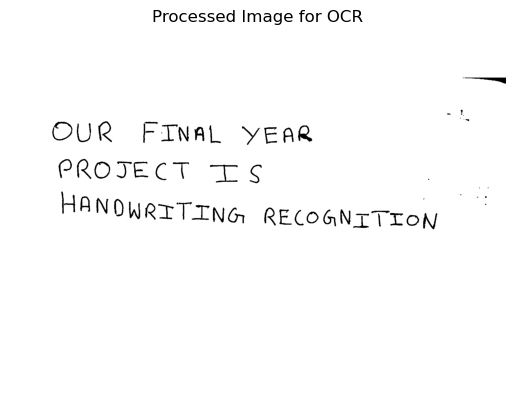

In [76]:
from PIL import Image
import cv2
import pytesseract
import matplotlib.pyplot as plt

# Tesseract executable path
pytesseract.pytesseract.tesseract_cmd = r"C:\\Program Files\\Tesseract-OCR\\tesseract.exe"

# Preprocessing function
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (0, 0), fx=2, fy=2)
    _, image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return image

# OCR function
def extract_text_from_image(image_path):
    processed_image = preprocess_image(image_path)
    pil_image = Image.fromarray(processed_image)
    extracted_text = pytesseract.image_to_string(pil_image, lang='eng')
    return extracted_text

# Image path

image_path = r"C:\Users\Mohammed Akif\Downloads\WhatsApp Image 2024-12-04 at 00.55.37_4e57195b.jpg"
# Extract text
extracted_text = extract_text_from_image(image_path)
print("Extracted Text:", extracted_text)

# Display the processed image
processed_image = preprocess_image(image_path)
plt.imshow(processed_image, cmap='gray')
plt.title("Processed Image for OCR")
plt.axis('off')
plt.show()
